# Machine Learning Week 1 - Examples

This notebook contains several example applications of some of the machine learning methods you will learn during this term. As the topics will be covered in greater detail later in the course, the explanation of the models and code is limited. 

Sections
- example 1 - classification
- example 2 - regression
- problem 1 - classification
- problem 2 - regression
- extra resources

In [1]:
#pip install imblearn
#pip install shap
#pip install mlxtend
#pip install six

In [54]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance
import shap


from mlxtend.plotting import plot_decision_regions

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso

from sklearn.decomposition import PCA

## Functions

These functions will be used in the analysis below to get the model results.

In [3]:
def get_results(truth, prediction, df, idx):
    
    y_test2 = truth.map({'benign':0, 'malignant':1})
    y_pred2 = pd.Series(prediction).map({'benign':0, 'malignant':1})


    acc = accuracy_score(y_test2, y_pred2)
    f1 = f1_score(y_test2, y_pred2)
    precision = precision_score(y_test2, y_pred2)
    recall = recall_score(y_test2, y_pred2)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


def get_reg_results(truth, prediction, df, idx):
    
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round(math.sqrt(mse_int), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    
    df.loc[idx, :] = [mse, rmse, mae]
    
    return df




# Example 1 - Classification Methods


Image recoginition using deep learning is an increasingly common tool for prediction. However, multiple traditional machine learning methods can be used with features extracted from images (as well as more standard datasets).

In this example, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass with the desired outcome of determining whether a tumor is beign or malignant. For any binary or categoriical outcome, classification methods must be used.


## Loading and inspecting the data

The data is avaiable here - https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

With a kaggle competition showing more detail about the variables here - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
data.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [6]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [7]:
data.iloc[:,6].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 6, dtype: int64

In [8]:
data.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Cleaning the data

**Extra Columns**

We have an ID value in column 0. We don't need this for our analysis and it will be easier to drop it now. You can acomplish this is many different ways - 2 extra examples are commented out with a #. 

**Column Names**

The columns do not have an informative name. While I have had a machine learning professor that purposefully labeled all of his datasets like this so that he wouldn't be biased in his analysis - thinking he should include a variable because he knows what it is. This is a bit extreme, but illustrates the difference between statistics/epidemology and machine learning. We are trying to get the best prediction possible. However, since column names can help make some inferences and aid in intreptreting the results, we will add in the correct names.


**Response Variable** 

The response variable is in the last column. 2 is used for benign and 4 is used for malignant. We want to map these to their labels and convert the column into a categorical variable. Note: some algorithms will only work with numeric values - then 0 and 1 should be used for binary variables with a categorical data type when possible.

**Missing Values**

There appears to be no missing data. However, when looking at the data type of each column, we can see that one is an 'object' despite appearing that it should be an int or float. This occurs when there is a character value in a numeric column. Looking at the value counts of that column, we can see that there are 16 '?' values. These can either be directly replaced with a desired value, dropped, or converted to nan.

In this notebook, we will convert the "?" to a nan and then deal with it in two ways. First, we will drop all of the rows that contain a missing value - a complete cases analysis in R. This assumes MCAR and can make a large difference in outcome if there is a substanial amount of missing values. In this dataset, dropping the 0.02% missing values will be completely fine. However, filling in the missing values with a multiple imputation method is advised in case you encounter a dataset with more missing values at a later date. You will see an example of the imputation code below, but the resulting dataset will *not* be used for brevity.  

**Splitting Data**

For a machine learning analysis, you need to split your data into two components - train and test. You train your model on the training data, and see how accurate it is on your test data. You cannot use the test dataset to make any decisions about choosing a model or changing the parameters of the model. If you do, then you have turned your test set into training data. The idea is to see how well your model performs on data that it hasn't seen before.

**Upsampling Data**

When building a classifer, if the dataset is imbalanced in respect to the outcome variable, the classifer can become biased. For example, if 5% of the tumors are benign and 95% malignant, then a classifer can predict malignant 100% of the time and achieve a high accuracy (95%) and other performance metrics. To combat this, you can upsample or downsample the dataset until it is balanced or introduce penalities to your algorithm for missing the minority class.

In this dataset, the 35/65% split is not imbalanced enough to merit any special adjustment. However, for illustrative purposes this notebook will also show an upsampling method. Since you don't want the test data to have an artifical disease prevalence - only the training data will be upsampled.

**Final Datasets**

This cleaning will end up with 2 datasets
- data = the original data cleaned with missing values dropped
- full_data = the original data cleaned with missing values dropped, upsampling to have class balance

Repeating the analyses on two different versions of the data set is called sensitivity analysis, since we expect the performance of the prediction to be similar in the two datasets and possibly improve with the "full_data" version.



In [10]:
## Extra Columns

data = data.iloc[:,1:]

#data = data.drop(0, axis = 1)

#data.drop(0, axis = 1, inplace = True)

data

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [11]:
## Column Names

data.columns= ['Thickness', 'size_uniformity', 'shape_uniformity', 'adhesion', 'size', 'nuclei', 'chromatin', 
              'nucleoli', 'mitoses', 'target']

In [12]:
## Response Variable

print(data.iloc[:,-1].value_counts())

data.iloc[:,-1] = data.iloc[:,-1].map({2:'benign', 4:'malignant'})

print(data.iloc[:,-1].value_counts())

data.iloc[:,-1] = data.iloc[:,-1].astype('category')

2    458
4    241
Name: target, dtype: int64
benign       458
malignant    241
Name: target, dtype: int64


In [13]:
## Missing Values - Special Values

print(data.isnull().sum())

data.iloc[:,5].replace(to_replace = '?', value = np.nan, inplace = True)

# data.iloc[:,6] = data.iloc[:,6].map({'?':np.nan})

print(data.isnull().sum())

Thickness           0
size_uniformity     0
shape_uniformity    0
adhesion            0
size                0
nuclei              0
chromatin           0
nucleoli            0
mitoses             0
target              0
dtype: int64
Thickness            0
size_uniformity      0
shape_uniformity     0
adhesion             0
size                 0
nuclei              16
chromatin            0
nucleoli             0
mitoses              0
target               0
dtype: int64


In [14]:
## Missing values - an example of how to impute missing data, this dataset will not be used

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data.iloc[:,:-1])

imputed_data = imp.transform(data.iloc[:,:-1])

imputed_data = pd.DataFrame(imputed_data)

imputed_data = pd.concat([imputed_data, pd.Series(data.iloc[:,-1])], axis = 1)

print(imputed_data.shape)
print(data.shape)


data = data.dropna()

print(data.shape)

(699, 10)
(699, 10)
(683, 10)


In [15]:
## Correcting data types
data.iloc[:,5] = data.iloc[:,5].astype('int')

print(data.dtypes)

imputed_data.iloc[:,:-1] = imputed_data.iloc[:,:-1].astype('int')

print(imputed_data.dtypes)


Thickness              int64
size_uniformity        int64
shape_uniformity       int64
adhesion               int64
size                   int64
nuclei                 int64
chromatin              int64
nucleoli               int64
mitoses                int64
target              category
dtype: object
0            int64
1            int64
2            int64
3            int64
4            int64
5            int64
6            int64
7            int64
8            int64
target    category
dtype: object



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
## Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=8)


In [17]:
## Upsampling Data
print(data.iloc[:,-1].value_counts())

sm = SMOTE(random_state = 8)

X_full_train, y_full_train = sm.fit_resample(X_train, y_train)

print(y_full_train.value_counts())
print(y_test.value_counts())

sm = SMOTE(random_state = 2020)


benign       444
malignant    239
Name: target, dtype: int64
malignant    360
benign       360
Name: target, dtype: int64
benign       84
malignant    53
Name: target, dtype: int64


## Analysis

There are multiple different classification methods. When choosing which models to use, thinking about how interpretable the results have to be can be a great guiding tool. For example, a logistic regression will give you odds ratios and significance levels while a neural network is a black box that only outputs predictions. 

In this notebook, we will look at 3 classification methods with differing levels of opaqueness.


### Decision Tree

Decision trees can either be a classification or regression algorithm - here it is classification. The model creates splits based on purity measures with the variables at the top of the tree being the most important or the ones that drive most of the purity gains. We will cover this in detail later in the course - but if you are interested in an overview now check out the wikipedia. https://en.wikipedia.org/wiki/Decision_tree_learning

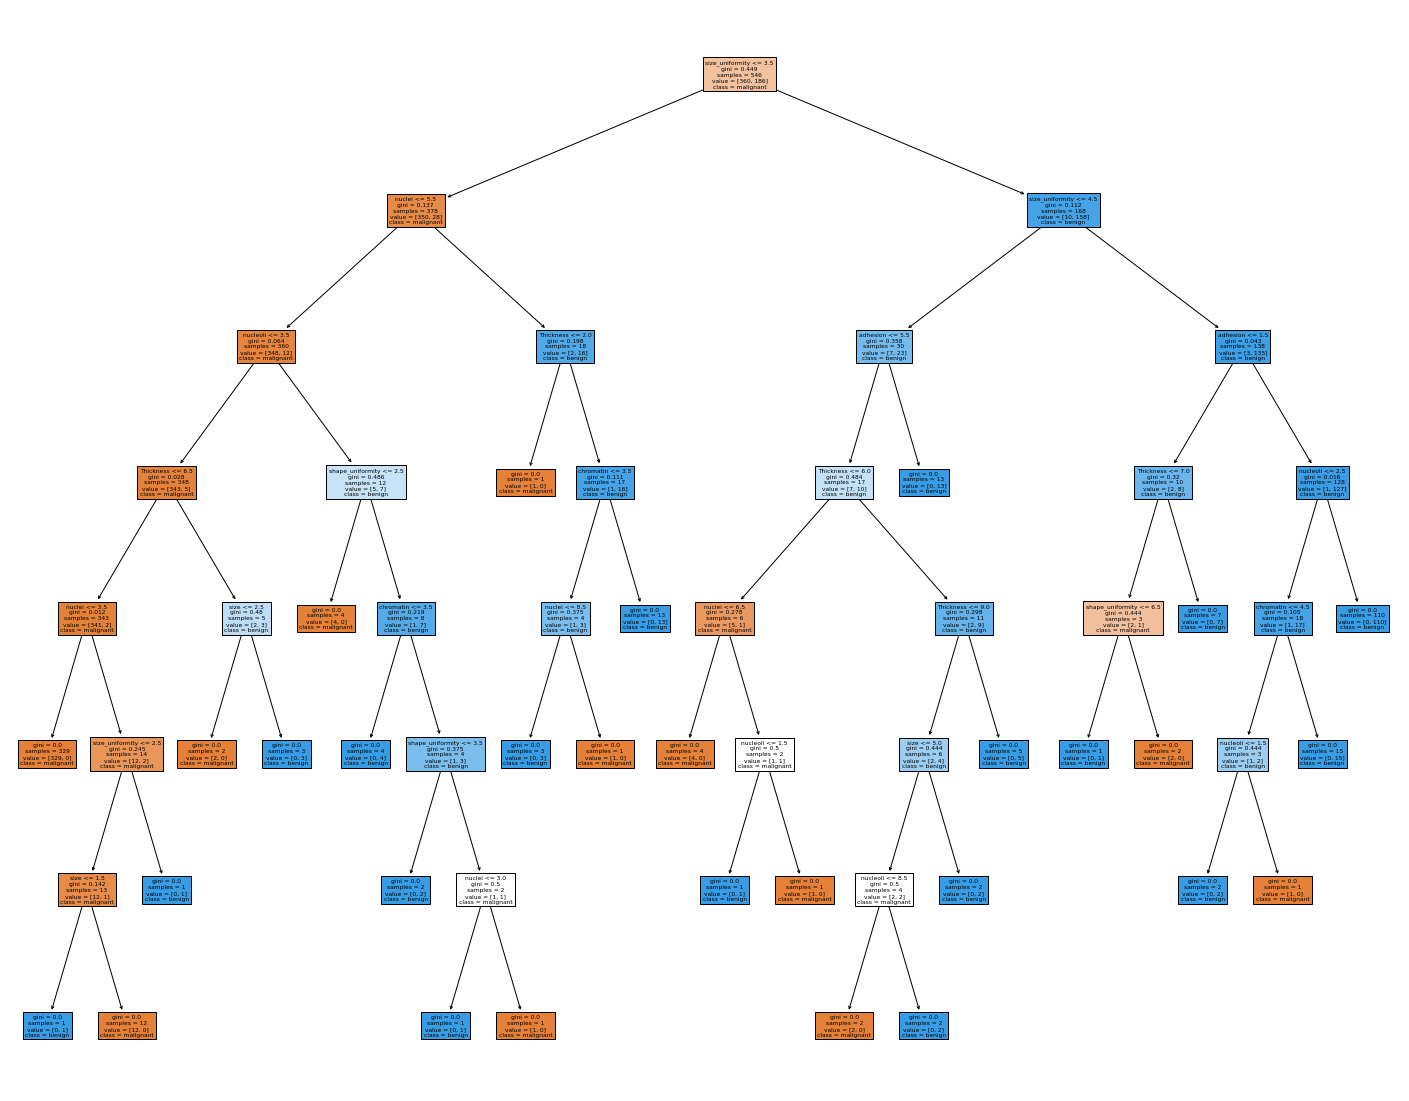

In [18]:
## Using data

tree_class = DecisionTreeClassifier(random_state = 3)

tree_class.fit(X_train, y_train)

y_pred = tree_class.predict(X_test)

#### Plotting the decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_class, 
                   feature_names=X_train.columns,  
                   class_names=y_train.values.unique(),
                   filled=True)

fig.savefig("decistion_tree.pdf") # Easy to see the graph here



Note: This figure is a little hard to see. However, the script will save a PDF version in the working directory which you can zoom in on.

The color denotes what the majority class is in that box (or split point). The boxes (leaves) that do not have any lines (stems) connecting them to lower boxes are the terminal points and where a prediction is made.

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


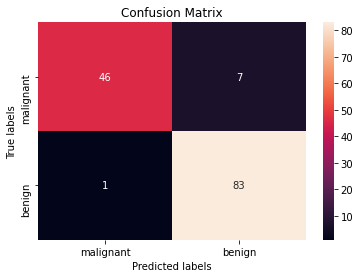

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,NaN,NaN,NaN,NaN
rf_data,NaN,NaN,NaN,NaN
rf_full_data,NaN,NaN,NaN,NaN
svm_data,NaN,NaN,NaN,NaN
svm_full_data,NaN,NaN,NaN,NaN


In [19]:
## Accuracy - this section looks at how to evaluate the performance of our prediction model 

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['malignant', 'benign']); ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()


## Create a df to store results
results = pd.DataFrame(columns = ['accuracy', 'f1', 'precision', 'recall'], 
                       index = ['dt_data', 'dt_full_data',
                               'rf_data', 'rf_full_data', 
                               'svm_data', 'svm_full_data'])

results = get_results(y_test, y_pred, results, 'dt_data')

results




**Cross Validation**

When constructing a model, there are several parameters that can be changed in an effort to get the optimum response. Looking to see which combination of parameters yields the best results is called 'tuning'. There is a method called gridsearchcv that tests all the permutations of the parameters you select and generates the best model for you.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

You should consult the documentation for the machine learning method that you are using to see what the parameters are. Here you would look at the sklearn DecisionTreeClassifier:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Note - if you test a lot of parameters and have a lot of data, it can make your model take a long time to train. Start with a few parameters and see if you want to increase the time it takes to run.

For the rest of the notebook, we will not be using cross validation - when the methods are covered in class you will understand what cross validiation is and which parameters you can tune.



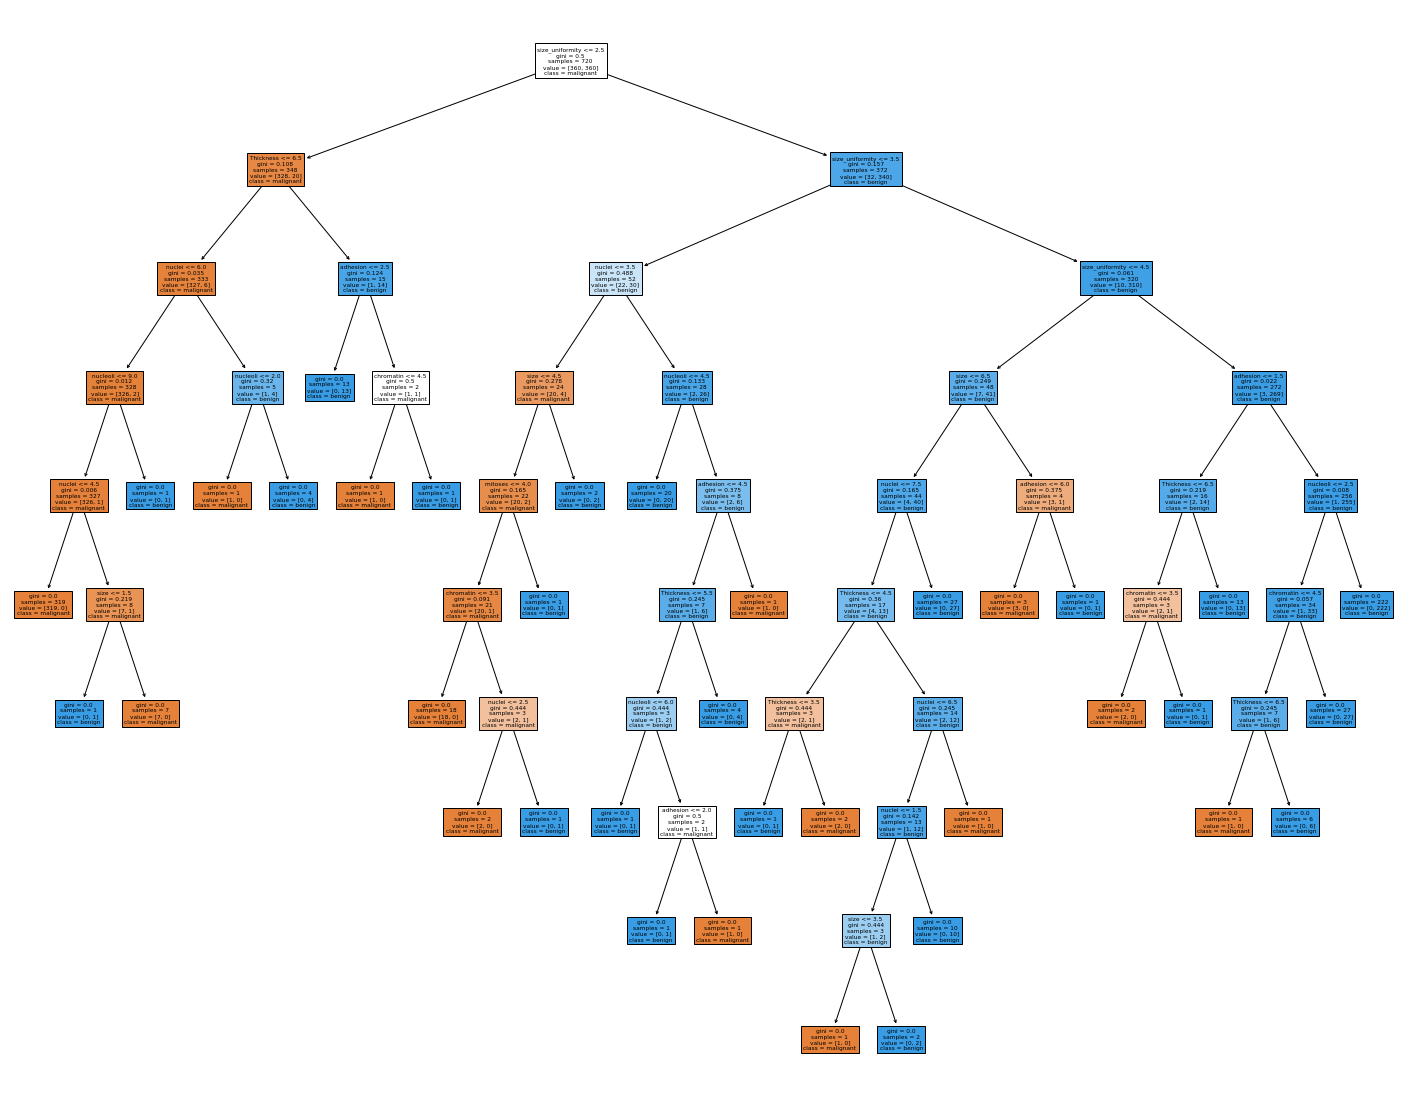

In [20]:
## Using full_data - we will now repeating the analysis above on the full_data dataset

tree_class = DecisionTreeClassifier(random_state = 3)

tree_class.fit(X_full_train, y_full_train)

y_pred = tree_class.predict(X_test)

#### Plotting the decision tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_class, 
                   feature_names=X_train.columns,  
                   class_names=y_train.values.unique(),
                   filled=True)

fig.savefig("decistion_tree_full.pdf") # Easy to see the graph here

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


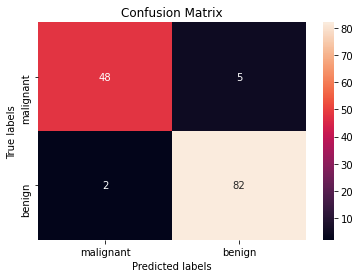

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,0.948905,0.932039,0.96,0.90566
rf_data,NaN,NaN,NaN,NaN
rf_full_data,NaN,NaN,NaN,NaN
svm_data,NaN,NaN,NaN,NaN
svm_full_data,NaN,NaN,NaN,NaN


In [21]:
labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['malignant', 'benign']); ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()

results = get_results(y_test, y_pred, results, 'dt_full_data')
results

## Random Forest (Ensemble Method)

Ensemble methods involve creatiing multiple models and using a form of a voting algorithm to generate the final prediction. Random Forests use multiple decision trees as their components. A simple example would be that if the random forest has 3 decision trees, and 2 predict malignant and 1 predicts benign - then the algorithm would predict that the tumor is malignant. Ensemble methods often outperform single models and are frequently the best performing model in kaggle competitions. Even an ensemble of weak predictors can outperform a singular strong algorithm.

If you want to read a bit about these methods before we cover them in class, check out:
- https://en.wikipedia.org/wiki/Random_forest
- https://builtin.com/data-science/random-forest-algorithm
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


**Interpreting the results**

As a random forest is made up of many decision trees, we cannot create an intuitive tree plot for the results. Instead, there are three methods to see which features are most important.

*Variable Importance Plots*

These plots show how each feature decreases impurity on average. You can think of it as displaying which variables are toward the top of the underlying decision trees the most. The drawbacks of the method is the tendency to prefer (select as important) numerical features and categorical features with high cardinality. This is the most common feature importantance plots used with random forests.

*Permutation Based Feature Importance*

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one. Drawbacks include that the method is computationally expensive and can have problem with highly-correlated features, it can report them as unimportant.

*SHAP Values*

Using the Shapley values from game theory, the plots can be used to estimate how each feature contributes to the prediction. 




The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction.


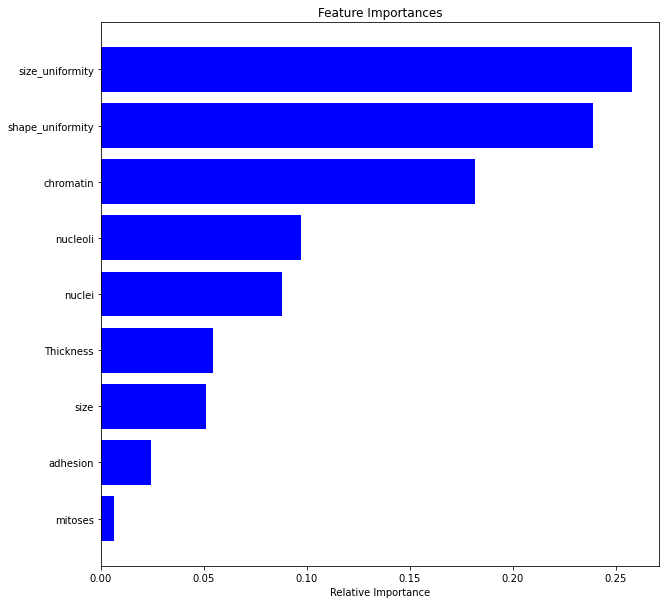

In [22]:
## Using data

rf_class = RandomForestClassifier(random_state = 3)

rf_class.fit(X_train, y_train)

y_pred = rf_class.predict(X_test)

#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = rf_class.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

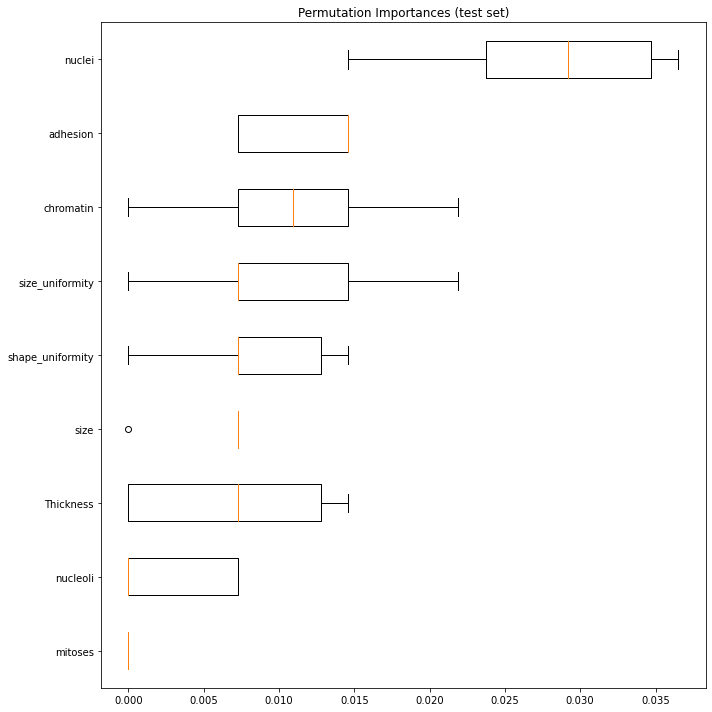

In [23]:
result = permutation_importance(rf_class, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


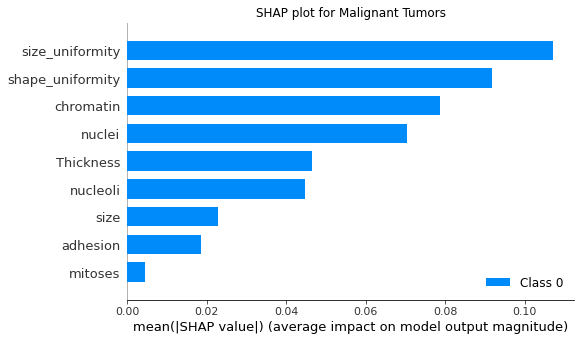

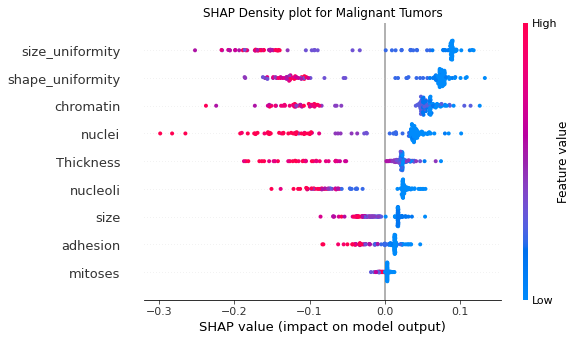

In [24]:
explainer = shap.TreeExplainer(rf_class)
shap_values = explainer.shap_values(X_test)

plt.title('SHAP plot for Malignant Tumors')
shap.summary_plot(shap_values, features = X_test, class_inds = [0])
plt.show()

plt.title('SHAP Density plot for Malignant Tumors')
shap.summary_plot(shap_values[0], features = X_test)
plt.show()


In [25]:
X_train.corr()

,Thickness,size_uniformity,shape_uniformity,adhesion,size,nuclei,chromatin,nucleoli,mitoses
Thickness,1.000000,0.627967,0.643174,0.483190,0.514385,0.588943,0.552386,0.523761,0.340837
size_uniformity,0.627967,1.000000,0.909917,0.693614,0.749288,0.688055,0.751218,0.720632,0.451123
shape_uniformity,0.643174,0.909917,1.000000,0.672314,0.731139,0.700178,0.721826,0.722314,0.424671
adhesion,0.483190,0.693614,0.672314,1.000000,0.585763,0.670541,0.674701,0.598395,0.420704
size,0.514385,0.749288,0.731139,0.585763,1.000000,0.603139,0.635693,0.648643,0.485025
nuclei,0.588943,0.688055,0.700178,0.670541,0.603139,1.000000,0.677777,0.595601,0.332335
chromatin,0.552386,0.751218,0.721826,0.674701,0.635693,0.677777,1.000000,0.653755,0.300473
nucleoli,0.523761,0.720632,0.722314,0.598395,0.648643,0.595601,0.653755,1.000000,0.400302
mitoses,0.340837,0.451123,0.424671,0.420704,0.485025,0.332335,0.300473,0.400302,1.000000


In [26]:
print(X_train['size_uniformity'].corr(X_train['shape_uniformity']))

0.9099172921754856


**What do these plots tell us**

The variable importance and shap plots idenitfy size uniformity and shape uniformity as the two most important predictors. Chromatin and nuclei also appear important, but to a lesser extent. The permutation plot does not identify size and shape uniformity as important to the model. However, the stated drawback of the method is that it can drop correlated predictors when it shouldn't. The high correlation (90%) of the two variables suggest that this is what is happening and the results from the permutation plot should be largely ignored. 

The shap plot is showing what is important in predicting a malignant tumor - with high values of shape and size uniformity corresponding to large protective effects. Interestingly thickness is shown to have mainly protective effects at high values - however it has a large grouping of slightly harmful effects (the red dots on the right side of the vertical line). This could be due to the over powering effects of shape and size uniformity (high thickness cannot overcome low uniformity) but warrants looking into the literature to make an informed hypothesis to what might be driving this result.

**Note**

For the rest of the notebook, only the variable importance plot will be shown. In your analysis, you may want to create all three plots but you should only present the one that tells your story in the clearest manner. In this example, I would have choosen only the shap plot.

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


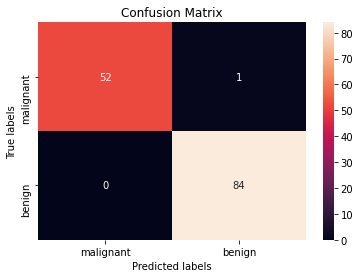

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,0.948905,0.932039,0.96,0.90566
rf_data,0.992701,0.990476,1,0.981132
rf_full_data,NaN,NaN,NaN,NaN
svm_data,NaN,NaN,NaN,NaN
svm_full_data,NaN,NaN,NaN,NaN


In [27]:
## Accuracy

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['malignant', 'benign']) 
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()

results = get_results(y_test, y_pred, results, 'rf_data')
results

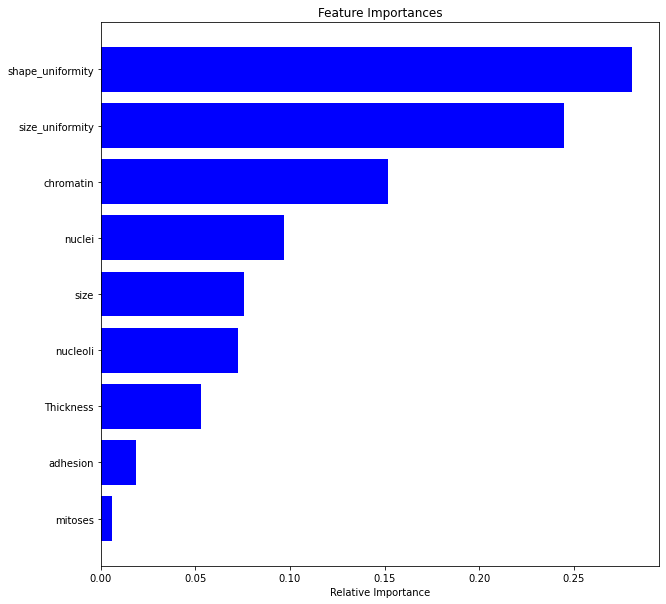

In [28]:
## Using full_data - again let's repeat the RF analysis on the "full_data"

rf_class = RandomForestClassifier(random_state = 3)

rf_class.fit(X_full_train, y_full_train)

y_pred = rf_class.predict(X_test)

#### Plotting the Variable importance plot

plt.figure(figsize= (10,10))
features = X_train.columns
importances = rf_class.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


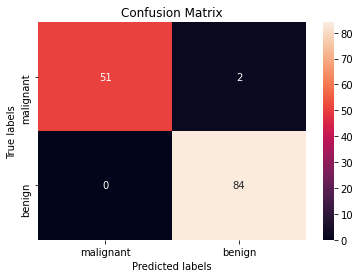

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,0.948905,0.932039,0.96,0.90566
rf_data,0.992701,0.990476,1,0.981132
rf_full_data,0.985401,0.980769,1,0.962264
svm_data,NaN,NaN,NaN,NaN
svm_full_data,NaN,NaN,NaN,NaN


In [29]:
## Accuracy

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['malignant', 'benign']) 
ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()

results = get_results(y_test, y_pred, results, 'rf_full_data')
results

## SVM

Support Vector Machines (SVM) can also be used in classification and regression problems - with classification being the more common use. The algorithm draws a hyperplane which splits the different target classes, looking to create the largest space between classes. You can think of it as drawing a line through a scatterplot - looking to split the data into their respective classes as best as possible. Again, this is an over simplified description that will be covered in detail later in the course.

SVM requires your predictors to be scaled (either 0 to 1 or -1 to 1). This notebook uses a pipeline to scale the data. Don't worry about this too much for now, scaling data will be presented later in the course when looking at methods that require it.

SVM is a black box method - meaning that you do not get probabilities tied to features, cannot see which features are important and do not have any plots that are typically used to show the results. As an example, I have included one plot of a linear decision boundary using only two predictors (you cannot plot higher dimensional data). Again, the concept is the same in higher dimensions - just using a hyperplane instead of a line. As this is not commonly included in an analysis, only one such plot is shown.

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


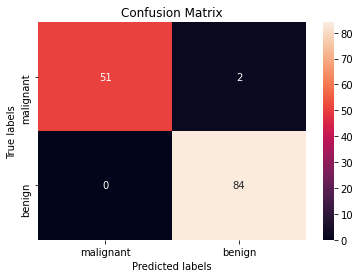

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,0.948905,0.932039,0.96,0.90566
rf_data,0.992701,0.990476,1,0.981132
rf_full_data,0.985401,0.980769,1,0.962264
svm_data,0.985401,0.980769,1,0.962264
svm_full_data,NaN,NaN,NaN,NaN


In [30]:
## Using data


svm_class = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma='auto', random_state = 3))
svm_class.fit(X_train, y_train)

y_pred = svm_class.predict(X_test)

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['malignant', 'benign']); ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()


results = get_results(y_test, y_pred, results, 'svm_data')


results


Text(0.5, 1.0, 'SVM Decision Region Boundary')

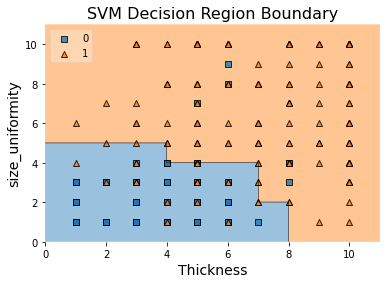

In [31]:

# Fit Support Vector Machine Classifier
X = X_train[['Thickness', 'size_uniformity']]
y = np.array(y_train.map({'benign':0, 'malignant':1}))

clf = SVC(decision_function_shape='ovo')
clf.fit(X.values, y) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y,
                      clf=clf,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

Pass labels=['malignant', 'benign'] as keyword args. From version 0.25 passing these as positional arguments will result in an error


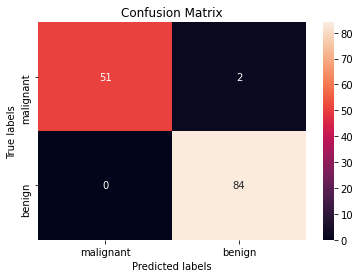

,accuracy,f1,precision,recall
dt_data,0.941606,0.92,0.978723,0.867925
dt_full_data,0.948905,0.932039,0.96,0.90566
rf_data,0.992701,0.990476,1,0.981132
rf_full_data,0.985401,0.980769,1,0.962264
svm_data,0.985401,0.980769,1,0.962264
svm_full_data,0.985401,0.980769,1,0.962264


In [32]:
## Using full_data

svm_class = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma='auto', random_state = 3))
svm_class.fit(X_full_train, y_full_train)

y_pred = svm_class.predict(X_test)

labels = ['malignant', 'benign']
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['malignant', 'benign']); ax.yaxis.set_ticklabels(['malignant', 'benign'])

plt.show()


results = get_results(y_test, y_pred, results, 'svm_full_data')


results


In [33]:
results.sort_values('f1', ascending = False)

,accuracy,f1,precision,recall
rf_data,0.992701,0.990476,1,0.981132
rf_full_data,0.985401,0.980769,1,0.962264
svm_data,0.985401,0.980769,1,0.962264
svm_full_data,0.985401,0.980769,1,0.962264
dt_full_data,0.948905,0.932039,0.96,0.90566
dt_data,0.941606,0.92,0.978723,0.867925


## Looking at the Results

I used the f1 score to determine the best model - which is a weighted average of the precision and recall. However, you might decide that either precision or recall is more important when predicting cancer (is reducing false positives or false negatives more important in the diagnostic process).

You can see that random forest consistently outperforms decision trees. This is often the case, but some times the added interpretability from the simpler decision trees outweighs performance gains from random forests (if the performance difference is small enough). While the SVM generally outperformed the decision trees and was worse than the random forests - this pattern will not always manifest itself. Meaning sometimes the SVM will be the best model.



# Example 2 - Regression Methods

Life expectancy can be an important for public health planning. The WHO has put out a dataset looking to figure out the factors influencing life expectancy. A statistical or epidemological approach would want to investigate the impact of the variables - so they could make decisions knowing the impact they will have on life expectancy. The machine learning approach is to try and predict life expectancy as accurately as possible amd could be important on determining retirement age or budgeting choices. Life insurance companies also employ actuaries who use predicted individual life expentencies to set policy price.

We will again try out several methods in order to get the best results. While decision trees, random forests, and svms can be used for regression tasks, we will be taking a brief look at a few other methods.


## Loading, inspecting, and cleaning the data

The data is avaiable in the same folder as this notebook and can be found onliine here - https://www.kaggle.com/kumarajarshi/life-expectancy-who

To simplify the analysis for this example, only data from 2015 will be considered. Country will also be dropped. While it could be a useful input for a linear mixed model, we are going to focus on other methods. Additionally, columns with mostly missing values and rows with any missing values will be dropped - resulting in 130 observations. As GDP and Population have a range spanning several orders of magnitude, they will be log transformed. 


In [34]:
life = pd.read_csv('Life_Expectancy_Data.csv')
life = life.loc[life['Year'] == 2015, :]
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [35]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          6 non-null      float64
 7   percentage expenditure           183 non-null    float64
 8   Hepatitis B                      174 non-null    float64
 9   Measles                          183 non-null    int64  
 10   BMI                             181 non-null    float64
 11  under-five deaths                183 non-null    int64  
 12  Polio                

In [36]:
life.drop('Country', axis = 1, inplace = True)
life.drop('Year', axis = 1, inplace = True)
life.drop('Alcohol', axis = 1, inplace = True)
life.drop('Total expenditure', axis = 1, inplace = True)

life = life.dropna()

life['Status'] = life['Status'].astype('category')

In [37]:
life.describe()

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000
mean,70.741538,158.676923,27.723077,3.355807,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923
std,7.997381,99.484969,96.426702,32.567606,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159
min,51.000000,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000
25%,65.725000,79.000000,0.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000
50%,72.150000,145.500000,3.000000,0.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000
75%,76.025000,215.000000,20.500000,0.000000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000
max,85.000000,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000


In [38]:

life['log_GDP'] = np.log(life['GDP'])
life['log_Population'] = np.log(life['Population'])

life.drop('GDP', axis = 1, inplace = True)
life.drop('Population', axis = 1, inplace = True)



In [39]:
target = life['Life expectancy ']
life.drop('Life expectancy ', axis = 1, inplace = True)

In [40]:
## Splitting the data
life = pd.get_dummies(life)
X_train, X_test, y_train, y_test = train_test_split(life, target, test_size=0.2, random_state=8)

In [66]:
## Setting up a results df

regression_results = pd.DataFrame(index = ['linear', 'lasso', 'pcr'],
                                 columns = ['MSE', 'RMSE', 'MAE'])

## Linear Regression

You guys know all about linear regression. It is included here so you can contrast it with the methods that follow.

In [67]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [68]:

lm_reg = sm.OLS(y_train, X_train_sm, random_state = 3)
lm_model = lm_reg.fit()

y_pred = lm_model.predict(X_test_sm)

print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     56.06
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           8.51e-39
Time:                        15:35:25   Log-Likelihood:                -238.05
No. Observations:                 104   AIC:                             510.1
Df Residuals:                      87   BIC:                             555.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [69]:
regression_results = get_reg_results(y_test, y_pred, regression_results, 'linear')
regression_results

,MSE,RMSE,MAE
linear,9.338,3.056,2.487
lasso,NaN,NaN,NaN
pcr,NaN,NaN,NaN


## Polynomial Regression

Polynomial regression is similar to linear regression - but contains additional variables that are exponentially transformed versions of the original. For example: y = mx + b -> y = mx + cx^2 + b. This allows the line of best fit to be non linear and fit the data more closely, but can quickly lead to overfitting and make interpretation more difficult. In the example below, the python function includes the original variables - unfortunately the number of new variables exceeds the number of observations, which generates overfitting and the unusual summary matrix below. Hence this method is *not* appropriate for this dataset. One possible solution would be to generate a small set of variables considered "important" rather than applying the transformation to the full data set. We will ignore the results from this analysis. 

In [70]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train_sm)
poly_X_test = poly.fit_transform(X_test_sm)

poly_reg = sm.OLS(y_train, poly_X_train, random_state = 3)
poly_model = poly_reg.fit()

y_pred = poly_model.predict(poly_X_test)

print(poly_model.summary())



                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                nan
Time:                        15:35:28   Log-Likelihood:                 1868.6
No. Observations:                 104   AIC:                            -3529.
Df Residuals:                       0   BIC:                            -3254.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262        inf          0        n

divide by zero encountered in true_divide
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in multiply
invalid value encountered in less_equal


## Lasso

Lasso applies a penalty to the regression that forces those variables that are not important to 0. This algorithm will be explored in detail in week 3, but a basic implementation is shown below to see if we are able to improve on the basic linear regression results.

In [71]:
lasso_model = Lasso(random_state =3, max_iter = 10000)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

In [72]:
lasso_coefs = pd.DataFrame(index = X_train.columns, columns = ['Beta'])
lasso_coefs.loc[:,'Beta'] = lasso_model.coef_ 
lasso_coefs

,Beta
Adult Mortality,-0.035665
infant deaths,0.069377
percentage expenditure,0.000000
Hepatitis B,0.012684
Measles,-0.000072
BMI,0.016460
under-five deaths,-0.048364
Polio,0.018646
Diphtheria,0.036414
HIV/AIDS,-0.000000


In [73]:
lasso_coefs[(lasso_coefs.T != 0).any()]

,Beta
Adult Mortality,-0.035665
infant deaths,0.069377
Hepatitis B,0.012684
Measles,-0.000072
BMI,0.016460
under-five deaths,-0.048364
Polio,0.018646
Diphtheria,0.036414
thinness 1-19 years,-0.154121
Schooling,1.192448


In [74]:
regression_results = get_reg_results(y_test, y_pred, regression_results, 'lasso')
regression_results

,MSE,RMSE,MAE
linear,9.338,3.056,2.487
lasso,13.874,3.725,2.78
pcr,NaN,NaN,NaN


## Principle Component Regression (PCR)

Principle components analysis (PCA) is a dimensionality reduction technique that transforms your predictors into components - which can be used as the input to a regression model (PCR). This obliterates the ability to interupt the results but can be very useful for data that is suffering from multi-collinearity or is too high demensional. 

Text(0, 0.5, 'cumulative explained variance')

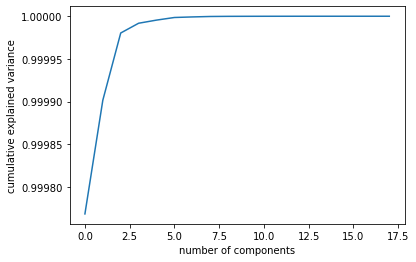

In [75]:
pca = PCA()
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [76]:
pca = PCA(n_components= 3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_sm_pca = sm.add_constant(X_train_pca)
X_test_sm_pca = sm.add_constant(X_test_pca)

pca_reg = sm.OLS(y_train, X_train_sm_pca, random_state = 3)
pca_model = pca_reg.fit()

y_pred = pca_model.predict(X_test_sm_pca)

print(pca_model.summary())



                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     56.58
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.82e-21
Time:                        15:35:40   Log-Likelihood:                -312.59
No. Observations:                 104   AIC:                             633.2
Df Residuals:                     100   BIC:                             643.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.8096      0.489    144.875      0.0

In [77]:
regression_results = get_reg_results(y_test, y_pred, regression_results, 'pcr')
regression_results.sort_values('RMSE', ascending = True)

,MSE,RMSE,MAE
linear,9.338,3.056,2.487
lasso,13.874,3.725,2.78
pcr,38.706,6.221,4.286


## Looking at the results

Mean Squared Error (MSE) penalizes errors (even small ones) harshly. Root Mean Squared Error (RMSE) imparts a large penalty to large errors. Mean Absolute Error (MAE) is robust to outliers and does not penalize errors as much as MSE.

Depending on what type of error you want to minimize, you can pick a different metric to determine model performance. As RMSE is the most common, we will use it here. We can see that the linear model performed the best. However, these algorithms have not been tuned and the performance order may change when looking at the optimal models.

# Problem 1 - Decision Trees

It is now your turn. Using the pima indians diabetes dataset (found in this folder and online at https://www.kaggle.com/uciml/pima-indians-diabetes-database), create your own decision tree algorithm, print the tree and confusion matrix and present your performance metrics. The basic loading and cleaning steps are provided for you.

Limit the max depth of your tree to 4 to improve the readbility of your graph. This will be a parameter that you normally tune, but we are just assigning a value here. Feel free to play around with it and see what it does to your figure. Take a look at https://mljar.com/blog/visualize-decision-tree/ and see if you can figure out how to plot the tree using a different style that catches your eye.

In [78]:
# Data
pima = pd.read_csv('diabetes.csv')
pima['Outcome'] = pima['Outcome'].astype('category')
pima['Outcome'] = pima['Outcome'].map({0: 'healthy', 1: 'diabetic'})
pima.info()

target = pima['Outcome']
pima.drop('Outcome', axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [79]:
# Split the data




In [80]:
## Analysis




In [1]:
## Results and confusion matrix plot


# Problem 2 - Lasso

Using the insurance dataset found in your folder and online here - https://www.kaggle.com/mirichoi0218/insurance, create a lasso model that predicts the cost of insurance, look at beta estimates for each predictor and give the performance metrics.


In [326]:
cost = pd.read_csv('insurance.csv')

cost.info()

target = cost['charges']
cost.drop('charges', axis = 1, inplace = True)
cost = pd.get_dummies(cost)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [327]:
X_train, X_test, y_train, y_test = train_test_split(cost, target, test_size=0.2, random_state=8)

In [328]:
# fit the lasso model here and predict on the test dataset





In [4]:
## Print out lasso Betas

In [3]:
## Print the lasso betas that are non zero

In [2]:
## Print out the error metrics


# Extra Resources

imputing data = https://scikit-learn.org/stable/modules/impute.html
handling imbalance datasets = https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
random forest = https://machinelearningmastery.com/random-forest-ensemble-in-python/
shap = https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b
svm = https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

